In [1]:
import numpy as np

In [2]:
import snsims
import healpy as hp

In [3]:
from astropy.cosmology import Planck15 as cosmo

In [4]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=9.6,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.10001, 1.1, 0.1))

In [5]:
# ten years
zdist.DeltaT

10.0

In [6]:
# The sky is >~ 40000 sq degrees ~ 4000 * LSST field of view
zdist.skyFraction * 2000 * 2

0.93084226773030898

In [7]:
zdist.zSampleSize().sum()

11689.729904376916

In [8]:
# To compare wih David's rate divide by number of days (note bins go from 0.1 to 1.0 in steps of 0.1)
zdist.zSampleSize() / 3650.

array([ 0.03496341,  0.08938394,  0.16237651,  0.24811709,  0.34150982,
        0.43838672,  0.53552506,  0.63055903,  0.72184416])

In [9]:
# Get samples of those numbers and histogram (consistency, should not be new information) 
np.histogram(zdist.zSamples, np.arange(0.1, 1.01, 0.1))[0]/3650.

array([ 0.03424658,  0.08328767,  0.15561644,  0.24575342,  0.33917808,
        0.42821918,  0.53260274,  0.61424658,  0.7139726 ])

In [10]:
otherEstimate = np.array([0.0297949656, 0.0773033283291, 0.143372148164, 0.224245838014, 0.315868414203, 0.413859866222
, 0.513435128451, 0.609346340913, 0.696255385228])


In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


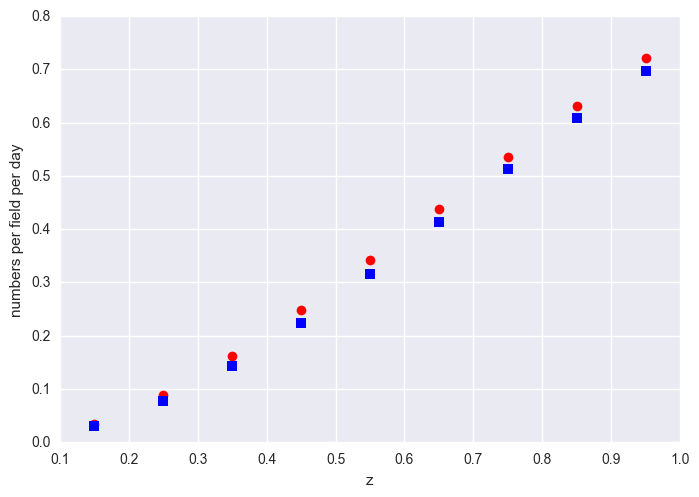

In [12]:
fig, ax = plt.subplots()
zvals = np.arange(0.15, 0.96, 0.1)
ax.plot(zvals, zdist.zSampleSize()/ 3650., 'or', label='snsims ')
ax.plot(zvals, otherEstimate, 'bs', label='David Rubin')
ax.set_xlabel('z')
ax.set_ylabel('numbers per field per day')

## Parts of the calculation

In [13]:
zbin_edges = np.arange(0.1, 1.01, 0.1)
diff_volume = cosmo.comoving_volume(zbin_edges[1:]) - cosmo.comoving_volume(zbin_edges[:-1])
print diff_volume

[  2.17006770e+09   5.32151113e+09   9.30243830e+09   1.37157266e+10
   1.82594260e+10   2.27178757e+10   2.69472784e+10   3.08599635e+10
   3.44098469e+10] Mpc3


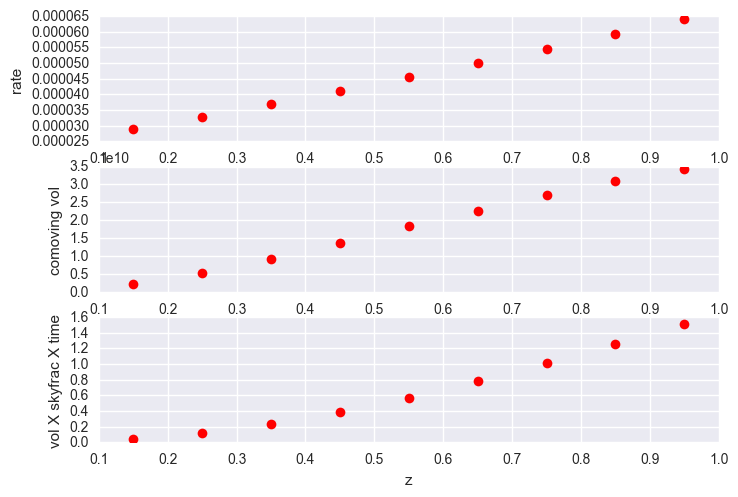

In [14]:
fig_subs, axs = plt.subplots(3)
axs[0].plot(zvals, zdist.snRate(zvals), 'or')
axs[1].plot(zvals, diff_volume , 'or')
axs[2].plot(zvals, diff_volume * zdist.snRate(zvals)*10.0/40000. / 365.0, 'or')
axs[2].set_xlabel('z')
axs[0].set_ylabel('rate')
axs[1].set_ylabel('comoving vol')
axs[2].set_ylabel('vol X skyfrac X time')

## Total Number of SN

In [25]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1), 
                             fieldArea=18000.,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.010001, 0.901, 0.1))

In [26]:
zdist.zSampleSize().sum() /1.0e6

13.100576240318187

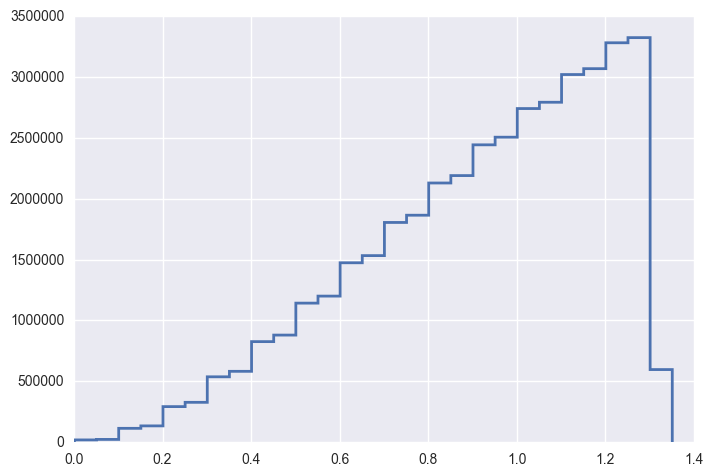

In [22]:
fig, ax  = plt.subplots()
_ = ax.hist(zdist.zSamples, bins=np.arange(0.001, 1.4, 0.05), histtype='step', lw=2., alpha=1.)